# first keras model on imdb without pre-trained word embeddings

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

# from keras.models import Sequential
from keras.datasets import imdb
from keras.models import Model
from keras.preprocessing import sequence
from keras.layers import Input, Dense, Embedding, LSTM, Dropout, Conv1D, Flatten, MaxPooling1D
from keras.callbacks import Callback, EarlyStopping, TensorBoard
from keras import regularizers

import matplotlib.pyplot as plt
%matplotlib inline

# import warnings
# warnings.filterwarnings('ignore')

/home/kuldeep.singh/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# defining max features
max_features = 20000

In [3]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
(25000, 'train sequences')
(25000, 'test sequences')


25000


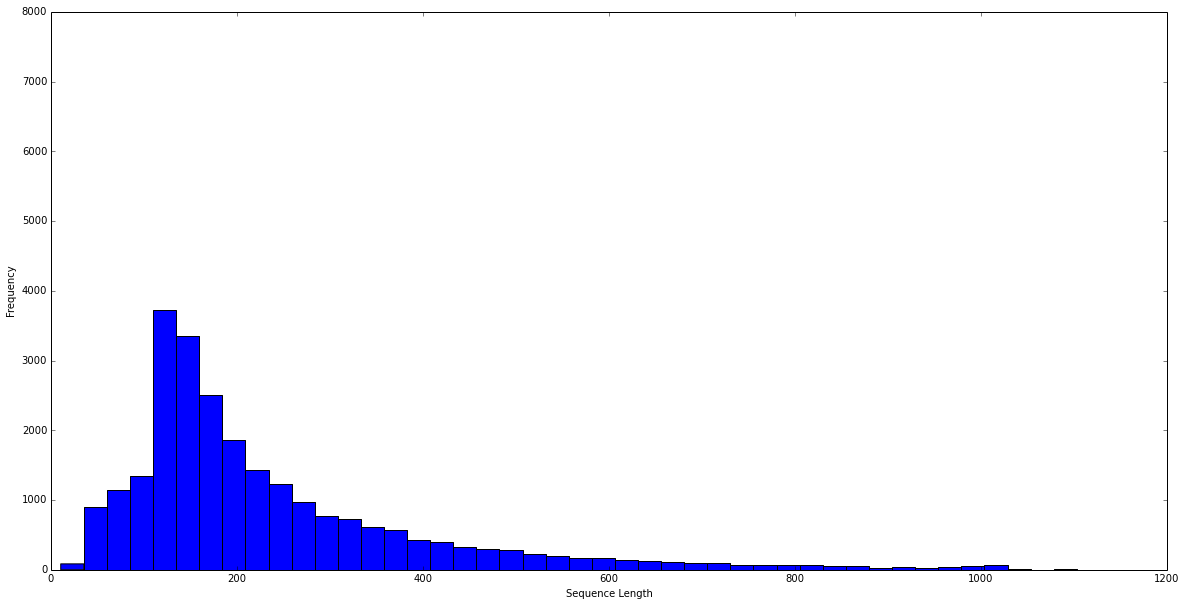

In [5]:
lenList = []
for d in x_train:
    counter = len(d)
    lenList.append(counter)
print len(lenList)

#print lenList[:10]
plt.figure(figsize=(20,10))
plt.hist(lenList, 100)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.axis([0, 1200, 0, 8000])
plt.show()

In [6]:
# defininf model variables 
max_len = 300 # according to the above graph 300 seems good
batch_size = 64
embed_size = 300

In [7]:
# padding and limiting sequences to 300 only 
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)


In [27]:
# defining model function 
def setup_model():
    _input = Input(shape=(300, ))
    x = Embedding(max_features, embed_size)(_input)
    
    x = Conv1D(32, 8, activation='relu', padding="same")(x)
    x = MaxPooling1D(4, strides=4, padding="same")(x)
    x = Dropout(rate=0.5)(x)
#     x = Conv1D(32, 8, activation='relu', padding="same")(x)
#     x = MaxPooling1D(4, strides=4, padding="same")(x)
#     x = Dropout(rate=0.5)(x)
#     x = Conv1D(128, 5, activation='relu')(x)
#     x = MaxPooling1D(5)(x)
#     x = Dropout(rate=0.2)(x)
#     x = Flatten()(x)

    x = LSTM(64, return_sequences=True, dropout=0.5, kernel_regularizer=regularizers.l2(0.05))(x)
#     x = Dropout(rate=0.5)(x)
    x = LSTM(32, dropout=0.5, kernel_regularizer=regularizers.l2(0.05))(x)
#     x = Dropout(rate=0.5)(x)
    
    _output = Dense(1, activation="sigmoid")(x)
    
    model = Model(inputs=_input, outputs=_output)
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [28]:
# early_stop = EarlyStopping(monitor='val_loss', min_delta=0,
#                                patience=10, verbose=0, mode='auto')

model = setup_model()
model.fit(x_train, y_train, epochs=3, batch_size=batch_size,  validation_data=(x_test[:5000], y_test[:5000])) #,
#           callbacks=[TensorBoard(log_dir='/data/users-workspace/kuldeep_data/tensorflow_logs/keras_imdb_1'),
#                      early_stop])


Train on 25000 samples, validate on 5000 samples
Epoch 1/3
25000/25000 [==============================] - 373s 15ms/step - loss: 1.3400 - acc: 0.7660 - val_loss: 0.3274 - val_acc: 0.8724
Epoch 2/3
25000/25000 [==============================] - 402s 16ms/step - loss: 0.2677 - acc: 0.9066 - val_loss: 0.3375 - val_acc: 0.8706
Epoch 3/3
25000/25000 [==============================] - 411s 16ms/step - loss: 0.1931 - acc: 0.9382 - val_loss: 0.3775 - val_acc: 0.8558


In [23]:
score, acc = model.evaluate(x_train[:5000], y_train[:5000], batch_size=batch_size)
print('Train score:', score)
print('Train accuracy:', acc)


5000/5000 [==============================] - 22s 4ms/step
('Train score:', 0.08343668174743653)
('Train accuracy:', 0.9858)


In [24]:
score, acc = model.evaluate(x_test[:10000], y_test[:10000], batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


10000/10000 [==============================] - 45s 4ms/step
('Test score:', 0.3735691873550415)
('Test accuracy:', 0.8659)


In [ ]:
1+1